In [ ]:
'''
y = ax+b

o/p = y = b0+b1x1+ b2x2 + ....
t = 1/(1+e^-y)

b0=b1=b2 =0



if t>0.5:
y_pred = 1
else:
y_pred = 0


b0=b0+alpla(y-t) * t*(1-t) * x0
  = 0+0.3(0-0.5)* 0.5 (1-0.3)* 1

b1= b1+alpha(y-t) * t*(1-t) * x1
  = 0+0.3(0.5) * 0.5 (1-0.5) *  2.75

b2 = b2 +alpha(y-t) * t* (1-t) * x2
   = 0+0.3(0.5) * 0.5 (1-0.5) *  2.55

o/p = b0 + b1x1 + b2x2 
    = -0.0375 -0.104*2.78 -0.090(2.55)
    = 0.55

'''


'''

CAP Curve:

CAP= Cumulative Accuracy profile



'''

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv("Social_Network_Ads.csv")
X=data.iloc[:,[2,3]].values
y=data.iloc[:,4].values

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [6]:
from sklearn.preprocessing  import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train) 
#here learn and transform because its training data- you will make the model learn from this data
X_test=sc_X.transform(X_test)

/home/sois/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [7]:
from sklearn.tree import DecisionTreeClassifier
#DecisionTreeClassifier 
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [8]:
y_pred = classifier.predict(X_test)

In [9]:
from sklearn.metrics import confusion_matrix #metrics is a measurement method which is not a machinelearning class
cm = confusion_matrix(y_test, y_pred)

In [10]:
cm

array([[62,  6],
       [ 3, 29]])

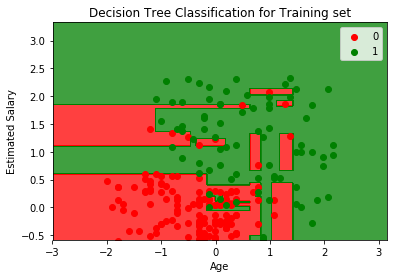

In [15]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                    np.arange(start=X_set[:,1].min()+1,stop=X_set[:,1].max()+1,step=0.01))

plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
         alpha=0.75,cmap=ListedColormap(('red','green')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c = ListedColormap(('red','green'))(i),label=j)
    
plt.title("Decision Tree Classification for Training set")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

